In [19]:
# Text Analysis Of Books Using Word Cloud
import requests
import re
import nltk
import spacy
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import pos_tag, ne_chunk

In [20]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /Users/patash/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/patash/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/patash/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/patash/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /Users/patash/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [21]:
# Import texts
nlp = spacy.load("en_core_web_sm")

def load_texts(urls):
    corpus = []
    for url in urls:
        response = requests.get(url)
        text = response.text
        
        # Remove non-text parts using regex
        text = re.sub(r'[^A-Za-z\s]', ' ', text)
        
        # Find the START and END markers
        start_idx = text.find('START')
        end_idx = text.find('*** END')
        
        if start_idx != -1 and end_idx != -1:
            text = text[start_idx + 5:end_idx]
        
        corpus.append(text)
    return corpus

# URLs of the books
urls = [
    "https://www.gutenberg.org/files/11/11-0.txt",  # Alice’s Adventures in Wonderland
    "https://www.gutenberg.org/files/12/12-0.txt",  # Through the Looking-Glass
    "https://www.gutenberg.org/files/29042/29042-0.txt"  # A Tangled Tale
]

corpus = load_texts(urls)


In [22]:
# Print first 200 characters of each text
for i, text in enumerate(corpus):
    print(f"Book {i+1}: {text[:200]}")

Book 1:     START OF THE PROJECT GUTENBERG EBOOK       
 Illustration 




Alice s Adventures in Wonderland

by Lewis Carroll

THE MILLENNIUM FULCRUM EDITION    

Contents

 CHAPTER I      Down 
Book 2:     START OF THE PROJECT GUTENBERG EBOOK       
 Illustration 




THROUGH THE LOOKING GLASS

And What Alice Found There

By Lewis Carroll

The Millennium Fulcrum Edition    




DRAM
Book 3:   DOCTYPE html 
 html class  client nojs  lang  en  dir  ltr  
 head 
  meta charset  UTF     

 title       Project Gutenberg  title 
  link rel  stylesheet  href   gutenberg style css v      
  link


In [23]:
# Tokenization
tokenized_texts = [word_tokenize(text) for text in corpus]
for i, tokens in enumerate(tokenized_texts):
    print(f"Book {i+1} first 150 tokens: {tokens[:150]}")

Book 1 first 150 tokens: ['START', 'OF', 'THE', 'PROJECT', 'GUTENBERG', 'EBOOK', 'Illustration', 'Alice', 's', 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', 'THE', 'MILLENNIUM', 'FULCRUM', 'EDITION', 'Contents', 'CHAPTER', 'I', 'Down', 'the', 'Rabbit', 'Hole', 'CHAPTER', 'II', 'The', 'Pool', 'of', 'Tears', 'CHAPTER', 'III', 'A', 'Caucus', 'Race', 'and', 'a', 'Long', 'Tale', 'CHAPTER', 'IV', 'The', 'Rabbit', 'Sends', 'in', 'a', 'Little', 'Bill', 'CHAPTER', 'V', 'Advice', 'from', 'a', 'Caterpillar', 'CHAPTER', 'VI', 'Pig', 'and', 'Pepper', 'CHAPTER', 'VII', 'A', 'Mad', 'Tea', 'Party', 'CHAPTER', 'VIII', 'The', 'Queen', 's', 'Croquet', 'Ground', 'CHAPTER', 'IX', 'The', 'Mock', 'Turtle', 's', 'Story', 'CHAPTER', 'X', 'The', 'Lobster', 'Quadrille', 'CHAPTER', 'XI', 'Who', 'Stole', 'the', 'Tarts', 'CHAPTER', 'XII', 'Alice', 's', 'Evidence', 'CHAPTER', 'I', 'Down', 'the', 'Rabbit', 'Hole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', '

In [24]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_texts = [[word for word in tokens if word.lower() not in stop_words] for tokens in tokenized_texts]

# Verify removal of stopwords
for i, tokens in enumerate(filtered_texts):
    print(f"Book {i+1} contains 'i': {tokens.count('i')}, 'me': {tokens.count('me')}")

Book 1 contains 'i': 0, 'me': 0
Book 2 contains 'i': 0, 'me': 0
Book 3 contains 'i': 0, 'me': 0


In [25]:
# Stemming
stemmer = PorterStemmer()
stemmed_texts = [[stemmer.stem(word) for word in tokens] for tokens in filtered_texts]
for i, tokens in enumerate(stemmed_texts):
    print(f"Book {i+1} first 50 stemmed tokens: {tokens[:50]}")

Book 1 first 50 stemmed tokens: ['start', 'project', 'gutenberg', 'ebook', 'illustr', 'alic', 'adventur', 'wonderland', 'lewi', 'carrol', 'millennium', 'fulcrum', 'edit', 'content', 'chapter', 'rabbit', 'hole', 'chapter', 'ii', 'pool', 'tear', 'chapter', 'iii', 'caucu', 'race', 'long', 'tale', 'chapter', 'iv', 'rabbit', 'send', 'littl', 'bill', 'chapter', 'v', 'advic', 'caterpillar', 'chapter', 'vi', 'pig', 'pepper', 'chapter', 'vii', 'mad', 'tea', 'parti', 'chapter', 'viii', 'queen', 'croquet']
Book 2 first 50 stemmed tokens: ['start', 'project', 'gutenberg', 'ebook', 'illustr', 'look', 'glass', 'alic', 'found', 'lewi', 'carrol', 'millennium', 'fulcrum', 'edit', 'dramati', 'person', 'arrang', 'commenc', 'game', 'white', 'red', 'piec', 'pawn', 'pawn', 'piec', 'tweedlede', 'daisi', 'daisi', 'humpti', 'dumpti', 'unicorn', 'haigha', 'messeng', 'carpent', 'sheep', 'oyster', 'oyster', 'walru', 'w', 'queen', 'lili', 'tiger', 'lili', 'r', 'queen', 'w', 'king', 'fawn', 'rose', 'r']
Book 3 firs

In [26]:
# Lemmatization
lemmatized_texts = [[token.lemma_ for token in nlp(' '.join(tokens))] for tokens in filtered_texts]
for i, tokens in enumerate(lemmatized_texts):
    print(f"Book {i+1} first 50 lemmatized tokens: {tokens[:50]}")

Book 1 first 50 lemmatized tokens: ['START', 'PROJECT', 'GUTENBERG', 'EBOOK', 'Illustration', 'Alice', 'Adventures', 'Wonderland', 'Lewis', 'Carroll', 'MILLENNIUM', 'FULCRUM', 'EDITION', 'content', 'chapter', 'Rabbit', 'Hole', 'CHAPTER', 'II', 'Pool', 'Tears', 'CHAPTER', 'III', 'Caucus', 'Race', 'Long', 'Tale', 'chapter', 'IV', 'rabbit', 'send', 'little', 'Bill', 'chapter', 'V', 'Advice', 'Caterpillar', 'CHAPTER', 'VI', 'Pig', 'Pepper', 'chapter', 'VII', 'Mad', 'Tea', 'Party', 'CHAPTER', 'VIII', 'Queen', 'Croquet']
Book 2 first 50 lemmatized tokens: ['START', 'PROJECT', 'GUTENBERG', 'EBOOK', 'Illustration', 'look', 'GLASS', 'Alice', 'find', 'Lewis', 'Carroll', 'Millennium', 'Fulcrum', 'Edition', 'DRAMATIS', 'person', 'arrange', 'commencement', 'game', 'WHITE', 'RED', 'piece', 'pawns', 'pawns', 'PIECES', 'Tweedledee', 'Daisy', 'Daisy', 'Humpty', 'Dumpty', 'Unicorn', 'Haigha', 'Messenger', 'Carpenter', 'Sheep', 'Oyster', 'Oyster', 'Walrus', 'W', 'Queen', 'Lily', 'Tiger', 'lily', 'R', 'Qu

In [27]:
# POS Tagging
pos_tagged_texts = [pos_tag(tokens) for tokens in filtered_texts]
for i, tags in enumerate(pos_tagged_texts):
    print(f"Book {i+1} first 20 POS tags: {tags[:20]}")

Book 1 first 20 POS tags: [('START', 'NNP'), ('PROJECT', 'NNP'), ('GUTENBERG', 'NNP'), ('EBOOK', 'NNP'), ('Illustration', 'NNP'), ('Alice', 'NNP'), ('Adventures', 'NNP'), ('Wonderland', 'NNP'), ('Lewis', 'NNP'), ('Carroll', 'NNP'), ('MILLENNIUM', 'NNP'), ('FULCRUM', 'NNP'), ('EDITION', 'NNP'), ('Contents', 'NNP'), ('CHAPTER', 'NNP'), ('Rabbit', 'NNP'), ('Hole', 'NNP'), ('CHAPTER', 'NNP'), ('II', 'NNP'), ('Pool', 'NNP')]
Book 2 first 20 POS tags: [('START', 'NNP'), ('PROJECT', 'NNP'), ('GUTENBERG', 'NNP'), ('EBOOK', 'NNP'), ('Illustration', 'NNP'), ('LOOKING', 'NNP'), ('GLASS', 'NNP'), ('Alice', 'NNP'), ('Found', 'NNP'), ('Lewis', 'NNP'), ('Carroll', 'NNP'), ('Millennium', 'NNP'), ('Fulcrum', 'NNP'), ('Edition', 'NNP'), ('DRAMATIS', 'NNP'), ('PERSON', 'NNP'), ('arranged', 'VBD'), ('commencement', 'JJ'), ('game', 'NN'), ('WHITE', 'NNP')]
Book 3 first 20 POS tags: [('DOCTYPE', 'NNP'), ('html', 'NN'), ('html', 'NN'), ('class', 'NN'), ('client', 'NN'), ('nojs', 'NN'), ('lang', 'NN'), ('en',

In [28]:
# Named Entity Recognition (NER)
for i, text in enumerate(lemmatized_texts):
    print(f"Book {i+1} Named Entities: {ne_chunk(pos_tag(text[:50]))}")

Book 1 Named Entities: (S
  START/NNP
  PROJECT/NNP
  GUTENBERG/NNP
  EBOOK/NNP
  Illustration/NNP
  Alice/NNP
  Adventures/NNP
  Wonderland/NNP
  (PERSON Lewis/NNP Carroll/NNP)
  MILLENNIUM/NNP
  FULCRUM/NNP
  EDITION/NNP
  content/NN
  chapter/NN
  (PERSON Rabbit/NNP Hole/NNP)
  CHAPTER/NNP
  II/NNP
  Pool/NNP
  Tears/NNP
  CHAPTER/NNP
  III/NNP
  (PERSON Caucus/NNP Race/NNP Long/NNP Tale/NNP)
  chapter/NN
  IV/NNP
  rabbit/NN
  send/VB
  little/JJ
  (PERSON Bill/NNP)
  chapter/NN
  (PERSON V/NNP Advice/NNP Caterpillar/NNP)
  CHAPTER/NNP
  VI/NNP
  Pig/NNP
  Pepper/NNP
  chapter/NN
  (ORGANIZATION VII/NNP Mad/NNP Tea/NNP Party/NNP)
  CHAPTER/NNP
  VIII/NNP
  Queen/NNP
  Croquet/NNP)
Book 2 Named Entities: (S
  START/NNP
  PROJECT/NNP
  GUTENBERG/NNP
  EBOOK/NNP
  Illustration/NNP
  look/VB
  (ORGANIZATION GLASS/NNP)
  Alice/NNP
  find/VBP
  (PERSON
    Lewis/NNP
    Carroll/NNP
    Millennium/NNP
    Fulcrum/NNP
    Edition/NNP)
  DRAMATIS/NNP
  person/NN
  arrange/NN
  commencement/

In [29]:
print(type(lemmatized_texts))  

<class 'list'>


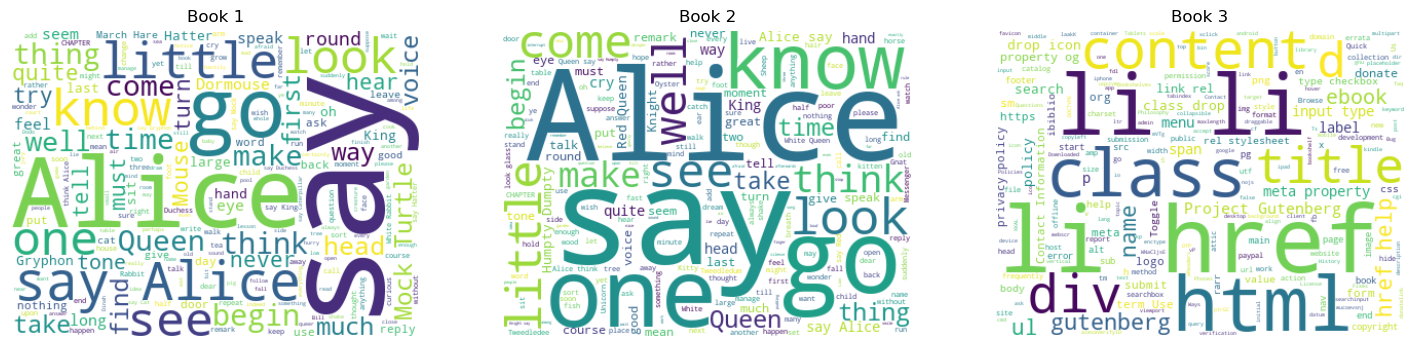

In [30]:
# Analysing The Text
# Word Cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

lemmatized_texts_dict = {f"Book {i+1}": " ".join(text) for i, text in enumerate(lemmatized_texts)}

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, (title, text) in enumerate(lemmatized_texts_dict.items()):
    wordcloud = WordCloud(width=400, height=300, background_color="white").generate(text)
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(title)
    axes[i].axis("off")

plt.show()


In [31]:
print(lemmatized_texts[:5])

[['START', 'PROJECT', 'GUTENBERG', 'EBOOK', 'Illustration', 'Alice', 'Adventures', 'Wonderland', 'Lewis', 'Carroll', 'MILLENNIUM', 'FULCRUM', 'EDITION', 'content', 'chapter', 'Rabbit', 'Hole', 'CHAPTER', 'II', 'Pool', 'Tears', 'CHAPTER', 'III', 'Caucus', 'Race', 'Long', 'Tale', 'chapter', 'IV', 'rabbit', 'send', 'little', 'Bill', 'chapter', 'V', 'Advice', 'Caterpillar', 'CHAPTER', 'VI', 'Pig', 'Pepper', 'chapter', 'VII', 'Mad', 'Tea', 'Party', 'CHAPTER', 'VIII', 'Queen', 'Croquet', 'Ground', 'chapter', 'IX', 'Mock', 'Turtle', 'Story', 'CHAPTER', 'x', 'Lobster', 'Quadrille', 'chapter', 'XI', 'Stole', 'Tarts', 'CHAPTER', 'XII', 'Alice', 'Evidence', 'chapter', 'Rabbit', 'Hole', 'Alice', 'beginning', 'get', 'tired', 'sit', 'sister', 'bank', 'nothing', 'twice', 'peep', 'book', 'sister', 'read', 'picture', 'conversation', 'use', 'book', 'think', 'Alice', 'without', 'picture', 'conversation', 'consider', 'mind', 'well', 'could', 'hot', 'day', 'make', 'feel', 'sleepy', 'stupid', 'whether', 'pl

In [32]:
# BoW
from collections import Counter
flattened_lemmas = [lemma for text in lemmatized_texts for lemma in text]

bow = Counter(flattened_lemmas)
top_5_words = bow.most_common(5)
print(top_5_words)

[('say', 1071), ('Alice', 862), ('go', 350), ('one', 261), ('get', 256)]


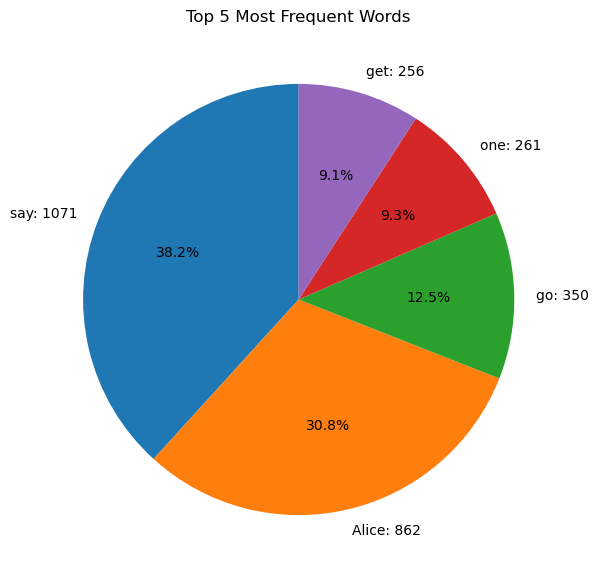

In [33]:
# Pie plot
words = [item[0] for item in top_5_words]
frequencies = [item[1] for item in top_5_words]

# Création du graphique circulaire (pie plot)
plt.figure(figsize=(7, 7))
plt.pie(frequencies, labels=[f"{word}: {freq}" for word, freq in zip(words, frequencies)], autopct='%1.1f%%', startangle=90)

# Ajouter un titre
plt.title("Top 5 Most Frequent Words")

# Afficher le graphique
plt.show()

Document 1:
Top words: [('say', 0.623258802821937), ('alice', 0.4692080421244394), ('little', 0.15169884068684883), ('know', 0.12582772056971184), ('look', 0.12229984055373858)]


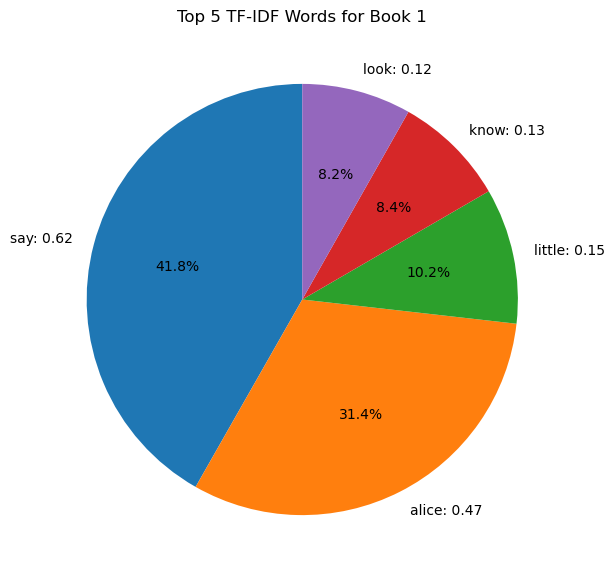

Document 2:
Top words: [('say', 0.5766645950044286), ('alice', 0.4988521820001341), ('queen', 0.20252545850432796), ('look', 0.15988851987183786), ('know', 0.14709743828209085)]


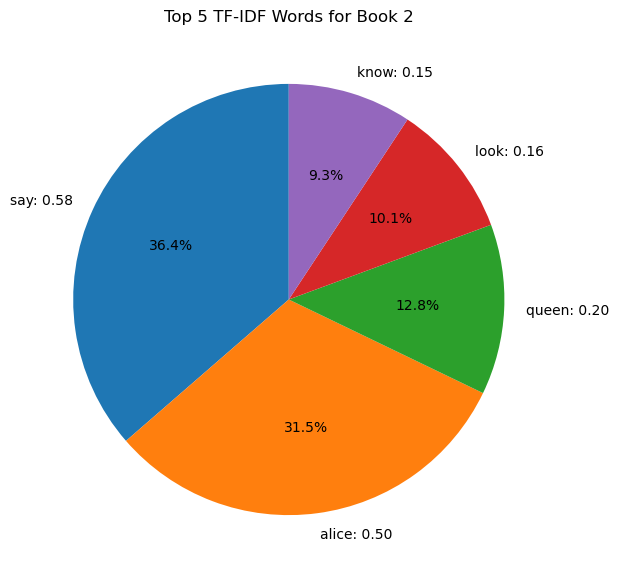

Document 3:
Top words: [('li', 0.6628532533738246), ('href', 0.44190216891588313), ('class', 0.2430461929037357), ('html', 0.22095108445794157), ('div', 0.15466575912055908)]


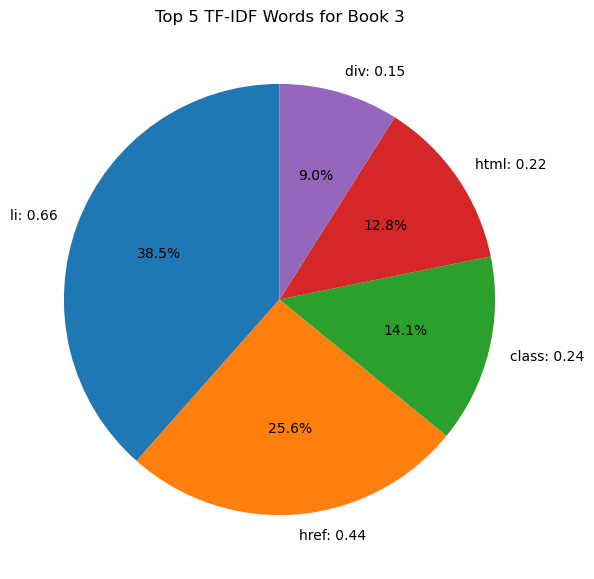

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

texts = [' '.join(text) for text in lemmatized_texts]

# Vectorizer TF-IDF
vectorizer = TfidfVectorizer(min_df=1, max_df=2) # mots apparaissent dans au moins un document =1
tfidf_matrix = vectorizer.fit_transform(texts)

# Words & Scores TF-IDF 
terms = vectorizer.get_feature_names_out()

for i, row in enumerate(tfidf_matrix.toarray()):
    print(f"Document {i+1}:")
    word_scores = [(terms[j], row[j]) for j in range(len(terms)) if row[j] > 0]
    word_scores = sorted(word_scores, key=lambda x: x[1], reverse=True)
    print(f"Top words: {word_scores[:5]}") 

    words = [item[0] for item in word_scores[:5]]
    scores = [item[1] for item in word_scores[:5]]

    plt.figure(figsize=(7, 7))
    plt.pie(scores, labels=[f"{word}: {score:.2f}" for word, score in zip(words, scores)], autopct='%1.1f%%', startangle=90)
    plt.title(f"Top 5 TF-IDF Words for Book {i+1}")
    plt.show()

